## Escolhendo um Complexo e um Filme

In [3]:
import pandas as pd

salas_rj = pd.read_csv('../data/salas_rj.csv', index_col=0)
salas_rj.head()

,id,name,neighborhood,latitude,longitude
0,953,Cine Araújo Jardim Guadalupe,Guadalupe,-22.84113,-43.36908
1,1304,Cine Odeon - Centro Cultural Luiz Severiano Ri...,Centro,-22.91071,-43.17602
2,1463,Cine Santa Teresa,Santa Teresa,-22.92154,-43.18614
3,1046,CineCarioca Méier,Méier,-22.90269,-43.28203
4,1597,Cineflix Center Shopping Rio de Janeiro (RIO),Tanque,-22.92484,-43.36103


In [7]:
bairros = ['Botafogo', 'Centro']
filtro_bairro = salas_rj[salas_rj['neighborhood'].isin(bairros)]['name'].unique()
filtro_bairro

array(['Cine Odeon - Centro Cultural Luiz Severiano Ribeiro',
       'Cinemark Botafogo', 'Cinesystem Botafogo',
       'Espaço Itaú de Cinema - Botafogo', 'Estação NET Botafogo',
       'Estação NET Rio', 'Kinoplex RioSul'], dtype=object)

In [30]:
complexo_escolhido = 'Estação NET Rio'
id_cinema = salas_rj[salas_rj['name'] == complexo_escolhido]['id'].values[0]
id_cinema

np.int64(34)

In [31]:
import requests

UA = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'

raiz_api = 'https://api-content.ingresso.com/v0/Sessions/city/{}/theater/{}'

resp_estacao_net = requests.get(
    url=raiz_api.format('2', id_cinema),
    headers={'user-agent': UA}
    )

resp_estacao_net.raise_for_status()

In [26]:
dados_estacao_net = resp_estacao_net.json()
filmes_estacao_net = []

for dia in dados_estacao_net:
    for filme in dia['movies']:
        filmes_estacao_net.append(filme)

filmes_cartaz = pd.DataFrame(filmes_estacao_net)

filmes_cartaz[['title', 'originalTitle']].drop_duplicates()

,title,originalTitle
0,Batman - O filme (1989),Batman
1,Bocaina,Bocaina
2,O Diabo Na Rua No Meio Do Redemunho,O Diabo Na Rua No Meio Do Redemunho
3,Bernadette,Bernadette
4,Tipos De Gentileza,Kinds Of Kindness
5,Motel Destino,Motel Destino
6,Sidonie No Japão,Sidonie ao Japan
7,A Viúva Clicquot – A Mulher Que Formou Um Império,Widow Clicquot
8,A Substância,The Substance
9,Fernanda Young - Foge-me Ao Controle,Fernanda Young - Foge-me Ao Controle


## Raspagem do IMDb

In [109]:
from bs4 import BeautifulSoup as bs

filme_escolhido = 'Deadpool & Wolverine'
# filme_escolhido = 'The Matrix'


url_busca = f'https://www.imdb.com/find/?q={filme_escolhido}&ref_=nv_sr_sm'

resp_imdb = requests.get(
    url=url_busca,
    headers={'user-agent': UA}
    )

soup_busca = bs(resp_imdb.text)
url_filme = 'https://www.imdb.com/' + soup_busca.select('ul > li > div > div > a')[0]['href']

resp_filme = requests.get(
    url=url_filme,
    headers={'user-agent': UA}
)
soup_filme = bs(resp_filme.text)

url_analises = 'https://www.imdb.com/' + soup_filme.select('section[data-testid="UserReviews"] > div > div > a')[0]['href']
resp_analises = requests.get(
    url=url_analises,
    headers={'user-agent': UA}
)
soup_analises = bs(resp_analises.text)

In [114]:
soup_busca.select('ul > li > div > div > a')[0]['href']

'/title/tt6263850/?ref_=fn_al_tt_1'

In [110]:
soup_filme.select('h1 > span')[0].text

'Deadpool & Wolverine'

In [111]:
soup_filme.select('ul > li > div > ul > li > a')[0].text

'Shawn Levy'

In [113]:
soup_filme.select('section[data-testid="UserReviews"] > div > div > a')[0]['href']

'/title/tt6263850/reviews/?ref_=tt_urv'

In [203]:
analises = ''

for tag in soup_analises.select('div[class="lister-list"]'):
    for analise in tag.select('div[class="text show-more__control"]'):
        analises += (analise.text.replace('\n', '').replace("'", "")) + ' '

In [204]:
analises

'Hugh Jackman is the perfect Wolverine. What a fun movie. I like the dialogue and clever quips with f bombs sprinkled in. Its definitely not taking itself too seriously. There is tons of fun cameos I didnt expect! I normally watch spoiler videos ahead of time, but I didnt on this occasion and Im glad I didnt because there was some oh snap moments! Its a very good action packed fun film. The breaking the Fox jokes and speaking to the camera jokes are too funny. I can definitely see more sequels for these two on the horizon. They are promoting this movie hard I just watched these two on Hot Ones eating chicken wings They make a dynamic duo. Until your 90 Wolverine ...until your 90 lol. What a crazy blast ! Bonkers !!Sooo !...What I can say about this movie is that they (the whole team behind the movie) never hesitated a second to go all in, with everything they have in stores, throwing the kitchen sink in there and everything else.Whats to love is how highly satisfying the movie is from 

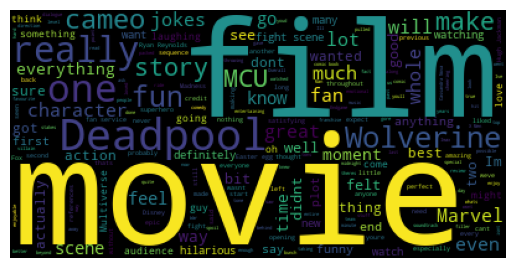

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nuvem = WordCloud().generate(analises)

plt.figure()
plt.imshow(nuvem)
plt.axis('off')

plt.show()